# Fibonacci Series

 Fn = Fn-1 + Fn-2
 
 A fibonacci series is a series characterized by an element value equal to the sum of previous two element values. It gets started from 0,1 ..
 
 Here it how it looks like-
 
 0,1,1,2,3,5,8,13,21......

In [1]:
# Function to return nth element in a fibonacci series
def fibonacci(n): 
    a = 0
    b = 1
    if n < 0: 
        print("Incorrect input") 
    elif n == 0: 
        return a 
    elif n == 1: 
        return b 
    else: 
        for i in range(2,n+1): 
            c = a + b 
            a = b 
            b = c 
        return b 

In [2]:
print(fibonacci(0),fibonacci(1),fibonacci(2),fibonacci(3),fibonacci(4),fibonacci(5),fibonacci(6),fibonacci(7),fibonacci(8))

0 1 1 2 3 5 8 13 21


In [3]:
# Can this be done more effeciently?
# Lets build a recursive function

def fibonacci_rec(n):
    if n <= 1: 
        return(n)
    return(fibonacci_rec(n - 1) + fibonacci_rec(n - 2))

In [4]:
print(fibonacci_rec(0),fibonacci_rec(1),fibonacci_rec(2),fibonacci_rec(3),fibonacci_rec(4),fibonacci_rec(5),fibonacci_rec(6),fibonacci_rec(7),fibonacci_rec(8))

0 1 1 2 3 5 8 13 21


Above is a computer programming as well as mathematical optimisation method developed by Richard Bellman. Goal is to solve a complex problem by breaking down into simpler sub-problems in a recursive manner.

Let's use a similar concept in the Open AI Gym FrozenLake environment to create a optimal policy for the agent to walk through the lake and reach the Goal

In [5]:
import gym
from gym import envs
import numpy as np

env = gym.make('FrozenLake-v0',is_slippery=False)
#env = gym.make('FrozenLake-v0')

The agent moves through a 4×4 gridworld, with states numbered as follows:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

and the agent has 4 potential actions:
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

Thus, S + ={0,1,…,15} 
S+={0,1,…,15}
, and A={0,1,2,3} 


In [6]:
env.render()


SFFF
FHFH
FFFH
HFFG


In [7]:
# print the state space and action space
print(env.observation_space)
print(env.action_space)

# print the total number of states and actions
print(env.nS)
print(env.nA)


Discrete(16)
Discrete(4)
16
4


Let's look at  one-step dynamics corresponding to a particular state and action. In particular, env.P[0][0] returns the the probability of each possible reward and next state, if the agent is in state 0 of the gridworld and decides to go left.

In [8]:
#prob, next_state, reward, done
env.P[14]

{0: [(1.0, 13, 0.0, False)],
 1: [(1.0, 14, 0.0, False)],
 2: [(1.0, 15, 1.0, True)],
 3: [(1.0, 10, 0.0, False)]}

Policy (π): The policy is the strategy that the agent employs to determine the next action based on the current state. It maps states to actions, the actions that promise the highest reward.

Value (V): The expected long-term return with discount, as opposed to the short-term reward R. Vπ(s) is defined as the expected long-term return of the current state under policy π. We discount rewards, or lower their estimated value, the further into the future they occur. See discount factor. And remember Keynes: “In the long run, we are all dead.” That’s why you discount future rewards.

Q-value or action-value (Q): Q-value is similar to Value, except that it takes an extra parameter, the current action a. Qπ(s, a) refers to the long-term return of the current state s, taking action a under policy π. Q maps state-action pairs to rewards. Note the difference between Q and policy.

In [9]:
# Value function

def policy_evaluation(env, policy, gamma=1, theta=1e-8):
    V = np.zeros(env.nS)
    while True:
        delta = 0
        for s in range(env.nS):
            Vs = 0
            for a, action_prob in enumerate(policy[s]):
                for prob, next_state, reward, done in env.P[s][a]:
                    Vs += action_prob * prob * (reward + gamma * V[next_state])
            delta = max(delta, np.abs(V[s]-Vs))
            V[s] = Vs
        if delta < theta:
            break
    return V

In [10]:
random_policy = np.ones([env.nS, env.nA]) / env.nA

In [11]:
random_policy

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def plot_values(V):
    # reshape value function
    V_sq = np.reshape(V, (4,4))

    # plot the state-value function
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    im = ax.imshow(V_sq, cmap='cool')
    for (j,i),label in np.ndenumerate(V_sq):
        ax.text(i, j, np.round(label, 5), ha='center', va='center', fontsize=14)
    plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.title('State-Value Function')
    plt.show()

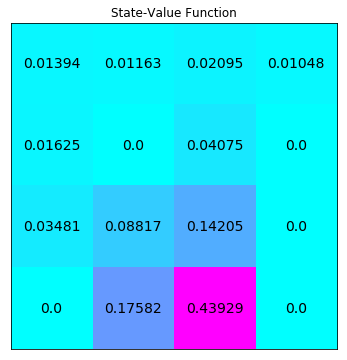

In [13]:
V = policy_evaluation(env, random_policy)

plot_values(V)

In [14]:
env.render()


SFFF
FHFH
FFFH
HFFG


In [15]:
def q_from_v(env, V, s, gamma=1):
    q = np.zeros(env.nA)
    for a in range(env.nA):
        for prob, next_state, reward, done in env.P[s][a]:
            q[a] += prob * (reward + gamma * V[next_state])
    return q

In [16]:
Q = np.zeros([env.nS, env.nA])
for s in range(env.nS):
    Q[s] = q_from_v(env, V, s)
print("Action-Value Function:")
print(Q)

Action-Value Function:
[[0.01393977 0.01624865 0.01163091 0.01393977]
 [0.01393977 0.         0.02095297 0.01163091]
 [0.01163091 0.04075153 0.01047648 0.02095297]
 [0.02095297 0.         0.01047648 0.01047648]
 [0.01624865 0.03480619 0.         0.01393977]
 [0.         0.         0.         0.        ]
 [0.         0.14205316 0.         0.02095297]
 [0.         0.         0.         0.        ]
 [0.03480619 0.         0.08816993 0.01624865]
 [0.03480619 0.17582037 0.14205316 0.        ]
 [0.08816993 0.43929118 0.         0.04075153]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.17582037 0.43929118 0.08816993]
 [0.17582037 0.43929118 1.         0.14205316]
 [0.         0.         0.         0.        ]]


In [17]:
V

array([0.01393977, 0.01163091, 0.02095297, 0.01047648, 0.01624865,
       0.        , 0.04075153, 0.        , 0.03480619, 0.08816993,
       0.14205316, 0.        , 0.        , 0.17582037, 0.43929118,
       0.        ])

In [18]:
def policy_improvement(env, V, gamma=1):
    policy = np.zeros([env.nS, env.nA]) / env.nA
    for s in range(env.nS):
        q = q_from_v(env, V, s, gamma)
        
        # OPTION 1: construct a deterministic policy 
        # policy[s][np.argmax(q)] = 1
        
        # OPTION 2: construct a stochastic policy that puts equal probability on maximizing actions
        best_a = np.argwhere(q==np.max(q)).flatten()
        policy[s] = np.sum([np.eye(env.nA)[i] for i in best_a], axis=0)/len(best_a)
        
    return policy


In [19]:
import copy

def policy_iteration(env, gamma=1, theta=1e-8):
    policy = np.ones([env.nS, env.nA]) / env.nA
    while True:
        V = policy_evaluation(env, policy, gamma, theta)
        new_policy = policy_improvement(env, V)
        
        # OPTION 1: stop if the policy is unchanged after an improvement step
        #if (new_policy == policy).all():
        #    break;
        
        # OPTION 2: stop if the value function estimates for successive policies has converged
        if np.max(abs(policy_evaluation(env, policy) - policy_evaluation(env, new_policy))) < theta*1e2:
            break;
        
        policy = copy.copy(new_policy)
    return policy, V


Optimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):
[[0.   1.   0.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 [0.25 0.25 0.25 0.25]] 



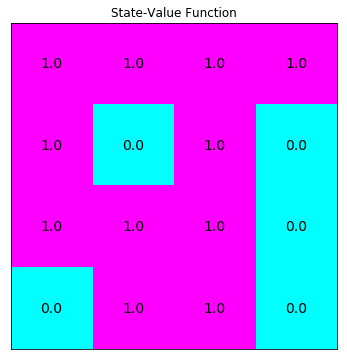

In [20]:
# obtain the optimal policy and optimal state-value function
policy_pi, V_pi = policy_iteration(env)

# print the optimal policy
print("\nOptimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):")
print(policy_pi,"\n")

plot_values(V_pi)


In [21]:
env.render()


SFFF
FHFH
FFFH
HFFG


In [22]:
av_reward = []
for i_episode in range(10):
    observation = env.reset()
    for t in range(10):
        env.render()
        action = np.argmax(policy_pi, axis=1)[observation]
        observation, reward, done, info = env.step(action)
        if done:
#             if reward == 0.0:
#                 print("LOSE")
#             else:
#                 print("WIN")
#             print("Episode finished after {} timesteps".format(t+1))
            break
    av_reward.append(reward)
    #if i_episode % 1000 == 0:
    print('Current avg_reward: %f' % np.mean(av_reward))
#env.monitor.close()
print(np.mean(av_reward))


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Current avg_reward: 1.000000

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Current avg_reward: 1.000000

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Current avg_reward: 1.000000

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Current avg_reward: 1.000000

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Current avg_reward: 1.000000

SFFF
FHFH
FFFH